## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20).reshape(50,1)
ones = [1] * 50
X = np.insert(X, 0, ones, axis=1)
print(X)

[[ 1.          0.        ]
 [ 1.          0.40816327]
 [ 1.          0.81632653]
 [ 1.          1.2244898 ]
 [ 1.          1.63265306]
 [ 1.          2.04081633]
 [ 1.          2.44897959]
 [ 1.          2.85714286]
 [ 1.          3.26530612]
 [ 1.          3.67346939]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.          4.89795918]
 [ 1.          5.30612245]
 [ 1.          5.71428571]
 [ 1.          6.12244898]
 [ 1.          6.53061224]
 [ 1.          6.93877551]
 [ 1.          7.34693878]
 [ 1.          7.75510204]
 [ 1.          8.16326531]
 [ 1.          8.57142857]
 [ 1.          8.97959184]
 [ 1.          9.3877551 ]
 [ 1.          9.79591837]
 [ 1.         10.20408163]
 [ 1.         10.6122449 ]
 [ 1.         11.02040816]
 [ 1.         11.42857143]
 [ 1.         11.83673469]
 [ 1.         12.24489796]
 [ 1.         12.65306122]
 [ 1.         13.06122449]
 [ 1.         13.46938776]
 [ 1.         13.87755102]
 [ 1.         14.28571429]
 [ 1.         14.69387755]
 

In [3]:
a = -2
b = 1
y = np.array(a * X[:,1] + b).reshape(X.shape[0],1)
print(y)

[[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.42857143]
 [-11.24489796]
 [-12.06122449]
 [-12.87755102]
 [-13.69387755]
 [-14.51020408]
 [-15.32653061]
 [-16.14285714]
 [-16.95918367]
 [-17.7755102 ]
 [-18.59183673]
 [-19.40816327]
 [-20.2244898 ]
 [-21.04081633]
 [-21.85714286]
 [-22.67346939]
 [-23.48979592]
 [-24.30612245]
 [-25.12244898]
 [-25.93877551]
 [-26.75510204]
 [-27.57142857]
 [-28.3877551 ]
 [-29.20408163]
 [-30.02040816]
 [-30.83673469]
 [-31.65306122]
 [-32.46938776]
 [-33.28571429]
 [-34.10204082]
 [-34.91836735]
 [-35.73469388]
 [-36.55102041]
 [-37.36734694]
 [-38.18367347]
 [-39.        ]]


#### Plot your data points. 

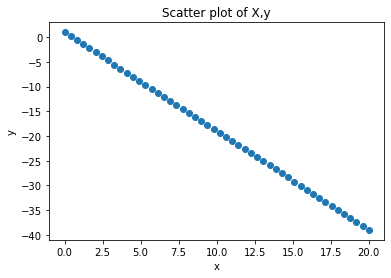

In [4]:
#### Plot your data points. 

plt.scatter(X[:,1], y)
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## General Methods


In [5]:
def hypothesis(theta,X):
    return X@theta


In [6]:
def cost_function(predictions,y):
    m = len(predictions)
    norm = (np.linalg.norm(predictions-y))**2    
    return norm /(2*m)



In [7]:
def gradient(X,y,predictions):
    m = len(X)
    return (X.T@(predictions-y))/m 

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

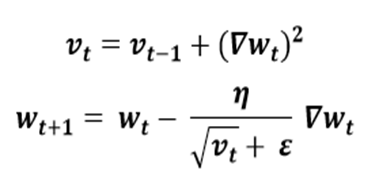

### Trial1 (learning rate = 0.1 , iterations = 100)

In [8]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.1
eps = 1e-8
iterations = 100

In [9]:
def AdaGrad_training(X, y, theta, learning_rate, iters):
    cost_history = []
    theta_history = []
    y_predicted_history = []
    v = 0
    
    predictions = hypothesis(theta,X)

    cost_history.append(cost_function(predictions,y))
    theta_history.append(theta)
    for i in range(iters):
        v = v + (gradient(X,y,predictions)) ** 2
        theta = theta - (learning_rate / np.sqrt(v) + eps) * gradient(X,y,predictions)
        #theta = theta - learning_rate * gradient(X,y,predictions)
        theta_history.append(theta)
        predictions = hypothesis(theta,X)
        y_predicted_history.append(predictions)
        cost = cost_function(predictions,y)
        cost_history.append(cost)
        
        if(cost < 0.01):
            break;
        print("iter={}, theta={},  cost= {}".format(i, theta_history[i], cost))
    return np.array(theta_history).reshape(len(theta_history),2), np.array(cost_history), y_predicted_history

theta_output, cost_output, predictions_output = AdaGrad_training(X, y, theta, learning_rate, iterations)

iter=0, theta=[[0.]
 [0.]],  cost= 222.82681029079507
iter=1, theta=[[-0.10000019]
 [-0.10000259]],  cost= 205.15115048619322
iter=2, theta=[[-0.16857263]
 [-0.16865861]],  cost= 191.51883588921174
iter=3, theta=[[-0.22347025]
 [-0.22366904]],  cost= 180.26143113476348
iter=4, theta=[[-0.27027235]
 [-0.27060063]],  cost= 170.60753212178167
iter=5, theta=[[-0.31156746]
 [-0.31203692]],  cost= 162.12690541007552
iter=6, theta=[[-0.34880321]
 [-0.34942296]],  cost= 154.55104487305874
iter=7, theta=[[-0.38288523]
 [-0.38366292]],  cost= 147.69923974964473
iter=8, theta=[[-0.41442443]
 [-0.41536672]],  cost= 141.4430742806255
iter=9, theta=[[-0.44385588]
 [-0.44496876]],  cost= 135.6874680223127
iter=10, theta=[[-0.47150238]
 [-0.47279139]],  cost= 130.35972127704136
iter=11, theta=[[-0.4976113 ]
 [-0.49908159]],  cost= 125.40278938993126
iter=12, theta=[[-0.52237714]
 [-0.52403358]],  cost= 120.77094862320662
iter=13, theta=[[-0.54595611]
 [-0.54780336]],  cost= 116.42689057948536
iter=14,

In [10]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.10000019]
 [-0.14081758]
 [-0.18163496]
 [-0.22245235]
 [-0.26326973]
 [-0.30408712]
 [-0.3449045 ]
 [-0.38572189]
 [-0.42653927]
 [-0.46735666]
 [-0.50817404]
 [-0.54899143]
 [-0.58980881]
 [-0.6306262 ]
 [-0.67144358]
 [-0.71226097]
 [-0.75307835]
 [-0.79389574]
 [-0.83471312]
 [-0.87553051]
 [-0.9163479 ]
 [-0.95716528]
 [-0.99798267]
 [-1.03880005]
 [-1.07961744]
 [-1.12043482]
 [-1.16125221]
 [-1.20206959]
 [-1.24288698]
 [-1.28370436]
 [-1.32452175]
 [-1.36533913]
 [-1.40615652]
 [-1.4469739 ]
 [-1.48779129]
 [-1.52860867]
 [-1.56942606]
 [-1.61024344]
 [-1.65106083]
 [-1.69187821]
 [-1.7326956 ]
 [-1.77351299]
 [-1.81433037]
 [-1.85514776]
 [-1.89596514]
 [-1.93678253]
 [-1.97759991]
 [-2.0184173 ]
 [-2.05923468]
 [-2.10005207]]
iter=1, hypothesis_output = [[-0.16857263]
 [-0.23741287]
 [-0.30625312]
 [-0.37509337]
 [-0.44393362]
 [-0.51277387]
 [-0.58161412]
 [-0.65045437]
 [-0.71929461]
 [-0.78813486]
 [-0.85697511]
 [-0.92581536]
 [-0.99465561

In [11]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  -1.3612539622900615
optimum value of Theta_1:  -1.3921247228876588
Best regression line:  [[ -1.36125396]
 [ -1.92946813]
 [ -2.49768231]
 [ -3.06589648]
 [ -3.63411065]
 [ -4.20232483]
 [ -4.770539  ]
 [ -5.33875317]
 [ -5.90696734]
 [ -6.47518152]
 [ -7.04339569]
 [ -7.61160986]
 [ -8.17982403]
 [ -8.74803821]
 [ -9.31625238]
 [ -9.88446655]
 [-10.45268072]
 [-11.0208949 ]
 [-11.58910907]
 [-12.15732324]
 [-12.72553741]
 [-13.29375159]
 [-13.86196576]
 [-14.43017993]
 [-14.9983941 ]
 [-15.56660828]
 [-16.13482245]
 [-16.70303662]
 [-17.2712508 ]
 [-17.83946497]
 [-18.40767914]
 [-18.97589331]
 [-19.54410749]
 [-20.11232166]
 [-20.68053583]
 [-21.24875   ]
 [-21.81696418]
 [-22.38517835]
 [-22.95339252]
 [-23.52160669]
 [-24.08982087]
 [-24.65803504]
 [-25.22624921]
 [-25.79446338]
 [-26.36267756]
 [-26.93089173]
 [-27.4991059 ]
 [-28.06732007]
 [-28.63553425]
 [-29.20374842]]


In [12]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.8080380777085763


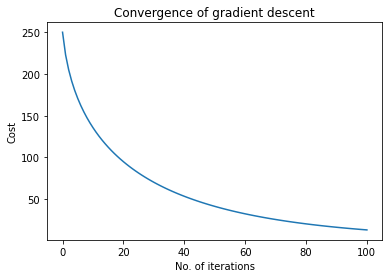

In [13]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

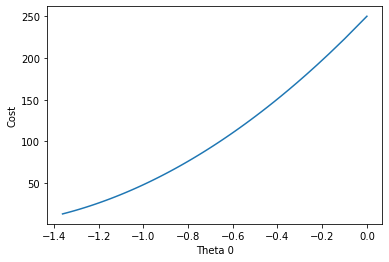

In [14]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

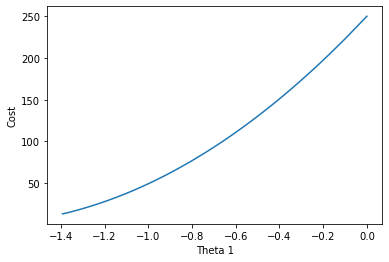

In [15]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

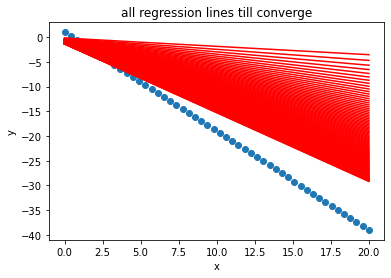

In [16]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

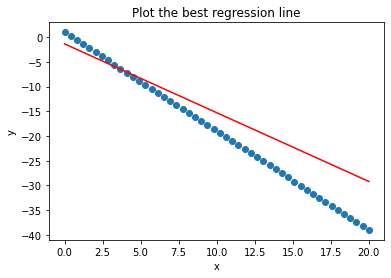

In [17]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Trial1 (learning rate = 0.5 , iterations = 1000)

In [18]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.5
eps = 1e-8
iterations = 1000

In [19]:
theta_output, cost_output, predictions_output = AdaGrad_training(X, y, theta, learning_rate, iterations)

iter=0, theta=[[0.]
 [0.]],  cost= 130.15512451938145
iter=1, theta=[[-0.50000019]
 [-0.50000259]],  cost= 78.19526252894623
iter=2, theta=[[-0.78960352]
 [-0.79244639]],  cost= 49.57204490991473
iter=3, theta=[[-0.99147498]
 [-0.99863439]],  cost= 32.352691970918244
iter=4, theta=[[-1.14164892]
 [-1.15425476]],  cost= 21.53063429930605
iter=5, theta=[[-1.25670683]
 [-1.27571749]],  cost= 14.559006440654967
iter=6, theta=[[-1.34607843]
 [-1.37233088]],  cost= 9.999964779866778
iter=7, theta=[[-1.41584191]
 [-1.45007011]],  cost= 6.989949898050624
iter=8, theta=[[-1.47024452]
 [-1.51308852]],  cost= 4.98990969745107
iter=9, theta=[[-1.51241789]
 [-1.56443051]],  cost= 3.6549308033817414
iter=10, theta=[[-1.54475579]
 [-1.60640921]],  cost= 2.760734489417219
iter=11, theta=[[-1.56913273]
 [-1.64082542]],  cost= 2.159928817699118
iter=12, theta=[[-1.58704031]
 [-1.66910448]],  cost= 1.7549670201949235
iter=13, theta=[[-1.59967816]
 [-1.69238722]],  cost= 1.4809879645204995
iter=14, theta=

In [20]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[ -0.50000019]
 [ -0.70408288]
 [ -0.90816557]
 [ -1.11224826]
 [ -1.31633096]
 [ -1.52041365]
 [ -1.72449634]
 [ -1.92857903]
 [ -2.13266172]
 [ -2.33674441]
 [ -2.5408271 ]
 [ -2.7449098 ]
 [ -2.94899249]
 [ -3.15307518]
 [ -3.35715787]
 [ -3.56124056]
 [ -3.76532325]
 [ -3.96940594]
 [ -4.17348863]
 [ -4.37757133]
 [ -4.58165402]
 [ -4.78573671]
 [ -4.9898194 ]
 [ -5.19390209]
 [ -5.39798478]
 [ -5.60206747]
 [ -5.80615017]
 [ -6.01023286]
 [ -6.21431555]
 [ -6.41839824]
 [ -6.62248093]
 [ -6.82656362]
 [ -7.03064631]
 [ -7.23472901]
 [ -7.4388117 ]
 [ -7.64289439]
 [ -7.84697708]
 [ -8.05105977]
 [ -8.25514246]
 [ -8.45922515]
 [ -8.66330785]
 [ -8.86739054]
 [ -9.07147323]
 [ -9.27555592]
 [ -9.47963861]
 [ -9.6837213 ]
 [ -9.88780399]
 [-10.09188668]
 [-10.29596938]
 [-10.50005207]]
iter=1, hypothesis_output = [[ -0.78960352]
 [ -1.11305103]
 [ -1.43649853]
 [ -1.75994604]
 [ -2.08339355]
 [ -2.40684106]
 [ -2.73028856]
 [ -3.05373607]
 [ -3.37718358]

In [21]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.7221603818797383
optimum value of Theta_1:  -1.9788579596621299
Best regression line:  [[  0.72216038]
 [ -0.08553674]
 [ -0.89323387]
 [ -1.700931  ]
 [ -2.50862812]
 [ -3.31632525]
 [ -4.12402238]
 [ -4.9317195 ]
 [ -5.73941663]
 [ -6.54711376]
 [ -7.35481088]
 [ -8.16250801]
 [ -8.97020513]
 [ -9.77790226]
 [-10.58559939]
 [-11.39329651]
 [-12.20099364]
 [-13.00869077]
 [-13.81638789]
 [-14.62408502]
 [-15.43178215]
 [-16.23947927]
 [-17.0471764 ]
 [-17.85487353]
 [-18.66257065]
 [-19.47026778]
 [-20.2779649 ]
 [-21.08566203]
 [-21.89335916]
 [-22.70105628]
 [-23.50875341]
 [-24.31645054]
 [-25.12414766]
 [-25.93184479]
 [-26.73954192]
 [-27.54723904]
 [-28.35493617]
 [-29.16263329]
 [-29.97033042]
 [-30.77802755]
 [-31.58572467]
 [-32.3934218 ]
 [-33.20111893]
 [-34.00881605]
 [-34.81651318]
 [-35.62421031]
 [-36.43190743]
 [-37.23960456]
 [-38.04730168]
 [-38.85499881]]


In [22]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9998564646954913


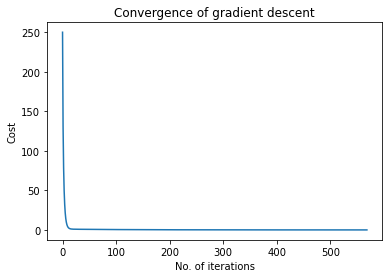

In [23]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

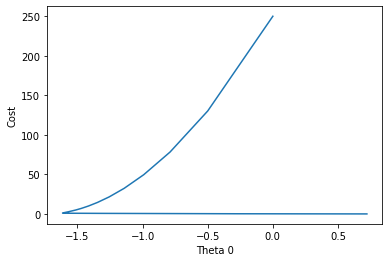

In [24]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

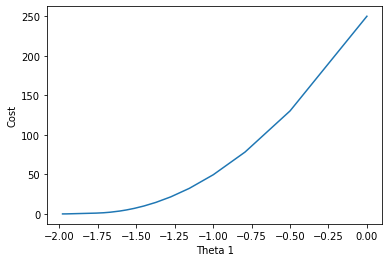

In [25]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

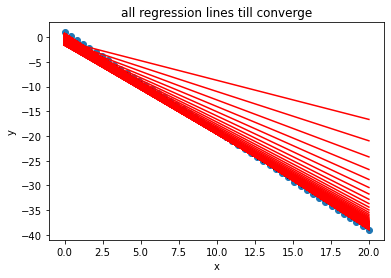

In [26]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

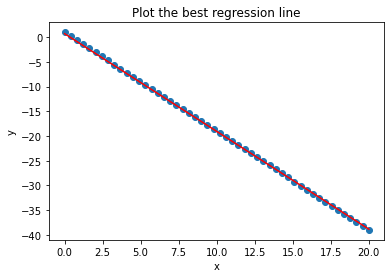

In [27]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

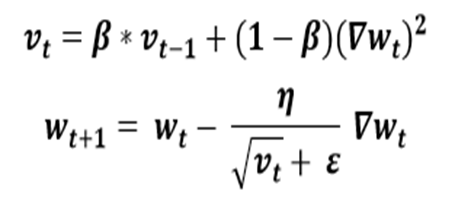

In [28]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.01
eps = 1e-8
beta = 0.99
iterations = 100

In [29]:
def RMSProp_training(X, y, theta, learning_rate, iters,beta):
    cost_history = []
    theta_history = []
    y_predicted_history = []
    v = 0
    
    predictions = hypothesis(theta,X)

    cost_history.append(cost_function(predictions,y))
    theta_history.append(theta)
    for i in range(iters):
        v = beta * v + (1 - beta) * (gradient(X,y,predictions)) ** 2
        theta = theta - (learning_rate / np.sqrt(v) + eps) * gradient(X,y,predictions)
        #theta = theta - learning_rate * gradient(X,y,predictions)
        theta_history.append(theta)
        predictions = hypothesis(theta,X)
        y_predicted_history.append(predictions)
        cost = cost_function(predictions,y)
        cost_history.append(cost)
        
        if(cost < 0.01):
            break;
        print("iter={}, theta={},  cost= {}".format(i, theta_history[i], cost))
    return np.array(theta_history).reshape(len(theta_history),2), np.array(cost_history), y_predicted_history

theta_output, cost_output, predictions_output = RMSProp_training(X, y, theta, learning_rate, iterations,beta)

iter=0, theta=[[0.]
 [0.]],  cost= 222.82681029079507
iter=1, theta=[[-0.10000019]
 [-0.10000259]],  cost= 205.1052127219849
iter=2, theta=[[-0.16875499]
 [-0.16884081]],  cost= 191.40377865699602
iter=3, theta=[[-0.22394283]
 [-0.22414149]],  cost= 180.06241001615422
iter=4, theta=[[-0.27111473]
 [-0.27144327]],  cost= 170.31411255807663
iter=5, theta=[[-0.31284383]
 [-0.31331433]],  cost= 161.73141149952582
iter=6, theta=[[-0.3505678 ]
 [-0.35118987]],  cost= 154.04770176843508
iter=7, theta=[[-0.3851852 ]
 [-0.38596701]],  cost= 147.0836674547278
iter=8, theta=[[-0.41730157]
 [-0.41825035]],  cost= 140.7119619480449
iter=9, theta=[[-0.44734771]
 [-0.44847008]],  cost= 134.83835094359452
iter=10, theta=[[-0.47564293]
 [-0.47694509]],  cost= 129.39082084189218
iter=11, theta=[[-0.50243164]
 [-0.50391945]],  cost= 124.31289393720616
iter=12, theta=[[-0.5279058 ]
 [-0.52958489]],  cost= 119.55932207935291
iter=13, theta=[[-0.55221944]
 [-0.55409523]],  cost= 115.0932006875175
iter=14, t

In [30]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.10000019]
 [-0.14081758]
 [-0.18163496]
 [-0.22245235]
 [-0.26326973]
 [-0.30408712]
 [-0.3449045 ]
 [-0.38572189]
 [-0.42653927]
 [-0.46735666]
 [-0.50817404]
 [-0.54899143]
 [-0.58980881]
 [-0.6306262 ]
 [-0.67144358]
 [-0.71226097]
 [-0.75307835]
 [-0.79389574]
 [-0.83471312]
 [-0.87553051]
 [-0.9163479 ]
 [-0.95716528]
 [-0.99798267]
 [-1.03880005]
 [-1.07961744]
 [-1.12043482]
 [-1.16125221]
 [-1.20206959]
 [-1.24288698]
 [-1.28370436]
 [-1.32452175]
 [-1.36533913]
 [-1.40615652]
 [-1.4469739 ]
 [-1.48779129]
 [-1.52860867]
 [-1.56942606]
 [-1.61024344]
 [-1.65106083]
 [-1.69187821]
 [-1.7326956 ]
 [-1.77351299]
 [-1.81433037]
 [-1.85514776]
 [-1.89596514]
 [-1.93678253]
 [-1.97759991]
 [-2.0184173 ]
 [-2.05923468]
 [-2.10005207]]
iter=1, hypothesis_output = [[-0.16875499]
 [-0.23766961]
 [-0.30658422]
 [-0.37549884]
 [-0.44441345]
 [-0.51332807]
 [-0.58224268]
 [-0.6511573 ]
 [-0.72007191]
 [-0.78898653]
 [-0.85790114]
 [-0.92681576]
 [-0.99573037

In [31]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  -1.441462401796309
optimum value of Theta_1:  -1.481425746561305
Best regression line:  [[ -1.4414624 ]
 [ -2.04612597]
 [ -2.65078954]
 [ -3.25545311]
 [ -3.86011668]
 [ -4.46478025]
 [ -5.06944382]
 [ -5.67410739]
 [ -6.27877096]
 [ -6.88343453]
 [ -7.4880981 ]
 [ -8.09276167]
 [ -8.69742524]
 [ -9.30208881]
 [ -9.90675238]
 [-10.51141595]
 [-11.11607952]
 [-11.72074309]
 [-12.32540666]
 [-12.93007023]
 [-13.5347338 ]
 [-14.13939737]
 [-14.74406094]
 [-15.34872451]
 [-15.95338808]
 [-16.55805165]
 [-17.16271522]
 [-17.76737879]
 [-18.37204236]
 [-18.97670593]
 [-19.5813695 ]
 [-20.18603307]
 [-20.79069664]
 [-21.39536021]
 [-22.00002378]
 [-22.60468735]
 [-23.20935092]
 [-23.81401449]
 [-24.41867806]
 [-25.02334163]
 [-25.6280052 ]
 [-26.23266877]
 [-26.83733234]
 [-27.44199591]
 [-28.04665948]
 [-28.65132305]
 [-29.25598662]
 [-29.86065019]
 [-30.46531376]
 [-31.06997733]]


In [32]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.8785021566734407


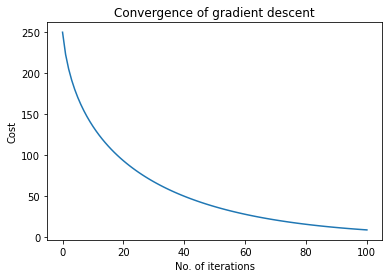

In [33]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

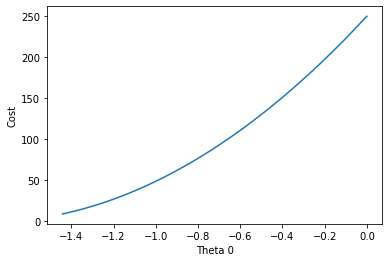

In [34]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

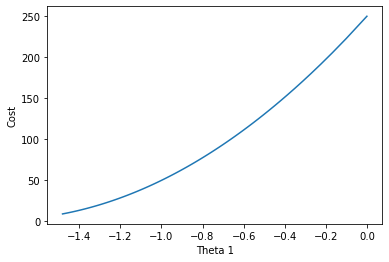

In [35]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

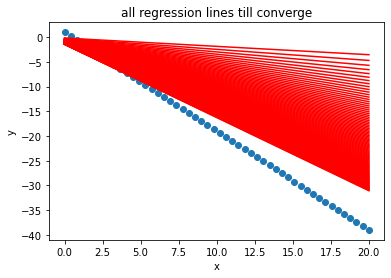

In [36]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

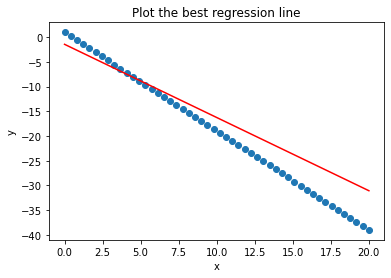

In [37]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Trial 2 (learning_rate =0.01 ,beta = 0.99, iterations=100)

In [38]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.1
eps = 1e-8
beta = 0.9
iterations = 1000

In [39]:
theta_output, cost_output, predictions_output = RMSProp_training(X, y, theta, learning_rate, iterations,beta)

iter=0, theta=[[0.]
 [0.]],  cost= 169.6379540145662
iter=1, theta=[[-0.31622796]
 [-0.31623036]],  cost= 125.49050379741446
iter=2, theta=[[-0.52257371]
 [-0.52354169]],  cost= 95.73969481442784
iter=3, theta=[[-0.68261811]
 [-0.68504672]],  cost= 74.06755676397921
iter=4, theta=[[-0.81523762]
 [-0.81953174]],  cost= 57.650804082772936
iter=5, theta=[[-0.92888306]
 [-0.93543074]],  cost= 44.94496217565963
iter=6, theta=[[-1.02813264]
 [-1.03733129]],  cost= 34.99564476454097
iter=7, theta=[[-1.11575859]
 [-1.12802796]],  cost= 27.16227834238938
iter=8, theta=[[-1.19356655]
 [-1.20935678]],  cost= 20.98832646230702
iter=9, theta=[[-1.26279547]
 [-1.28259273]],  cost= 16.13338013139171
iter=10, theta=[[-1.32433079]
 [-1.34866157]],  cost= 12.334732727179151
iter=11, theta=[[-1.37882844]
 [-1.40826269]],  cost= 9.384322505568427
iter=12, theta=[[-1.42679199]
 [-1.4619453 ]],  cost= 7.114249021699457
iter=13, theta=[[-1.46862378]
 [-1.51015849]],  cost= 5.387326125895777
iter=14, theta=[[

In [40]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.31622796]
 [-0.44530157]
 [-0.57437519]
 [-0.7034488 ]
 [-0.83252242]
 [-0.96159604]
 [-1.09066965]
 [-1.21974327]
 [-1.34881689]
 [-1.4778905 ]
 [-1.60696412]
 [-1.73603774]
 [-1.86511135]
 [-1.99418497]
 [-2.12325858]
 [-2.2523322 ]
 [-2.38140582]
 [-2.51047943]
 [-2.63955305]
 [-2.76862667]
 [-2.89770028]
 [-3.0267739 ]
 [-3.15584751]
 [-3.28492113]
 [-3.41399475]
 [-3.54306836]
 [-3.67214198]
 [-3.8012156 ]
 [-3.93028921]
 [-4.05936283]
 [-4.18843644]
 [-4.31751006]
 [-4.44658368]
 [-4.57565729]
 [-4.70473091]
 [-4.83380453]
 [-4.96287814]
 [-5.09195176]
 [-5.22102537]
 [-5.35009899]
 [-5.47917261]
 [-5.60824622]
 [-5.73731984]
 [-5.86639346]
 [-5.99546707]
 [-6.12454069]
 [-6.25361431]
 [-6.38268792]
 [-6.51176154]
 [-6.64083515]]
iter=1, hypothesis_output = [[ -0.52257371]
 [ -0.73626419]
 [ -0.94995468]
 [ -1.16364516]
 [ -1.37733565]
 [ -1.59102613]
 [ -1.80471662]
 [ -2.0184071 ]
 [ -2.23209759]
 [ -2.44578808]
 [ -2.65947856]
 [ -2.87316905]
 

In [41]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.7408096799760996
optimum value of Theta_1:  -1.9804406507393477
Best regression line:  [[  0.74080968]
 [ -0.06753344]
 [ -0.87587657]
 [ -1.68421969]
 [ -2.49256281]
 [ -3.30090593]
 [ -4.10924906]
 [ -4.91759218]
 [ -5.7259353 ]
 [ -6.53427842]
 [ -7.34262155]
 [ -8.15096467]
 [ -8.95930779]
 [ -9.76765092]
 [-10.57599404]
 [-11.38433716]
 [-12.19268028]
 [-13.00102341]
 [-13.80936653]
 [-14.61770965]
 [-15.42605278]
 [-16.2343959 ]
 [-17.04273902]
 [-17.85108214]
 [-18.65942527]
 [-19.46776839]
 [-20.27611151]
 [-21.08445463]
 [-21.89279776]
 [-22.70114088]
 [-23.509484  ]
 [-24.31782713]
 [-25.12617025]
 [-25.93451337]
 [-26.74285649]
 [-27.55119962]
 [-28.35954274]
 [-29.16788586]
 [-29.97622898]
 [-30.78457211]
 [-31.59291523]
 [-32.40125835]
 [-33.20960148]
 [-34.0179446 ]
 [-34.82628772]
 [-35.63463084]
 [-36.44297397]
 [-37.25131709]
 [-38.05966021]
 [-38.86800333]]


In [42]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.999875213366122


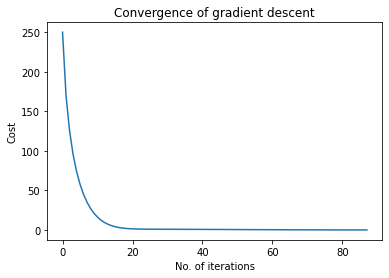

In [43]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

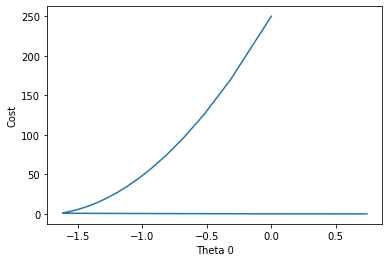

In [44]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

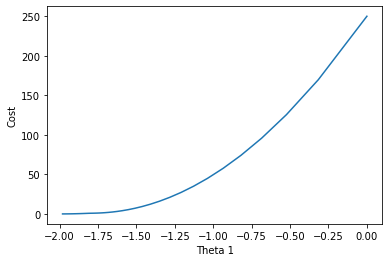

In [45]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

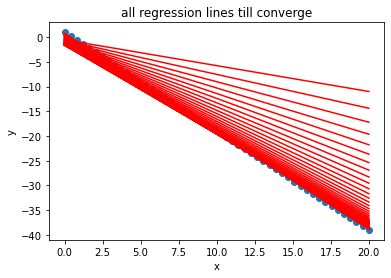

In [46]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

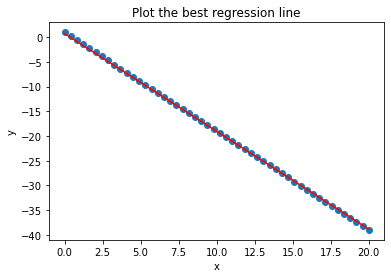

In [47]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

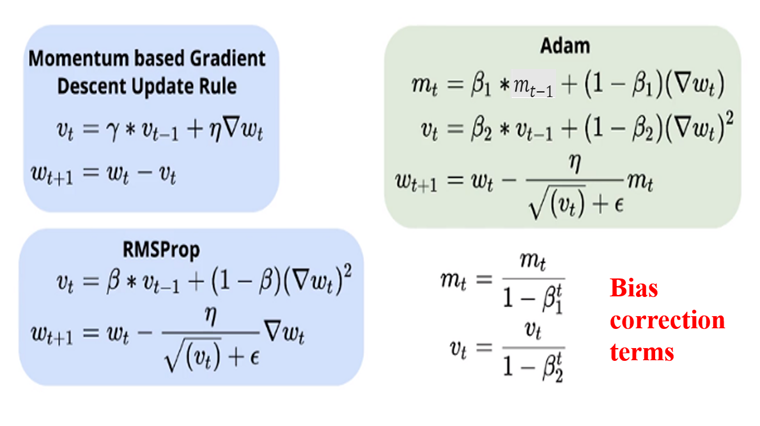

### Trial 1 (learning_rate =0.001 ,beta1 = 0.8,beta2 = 0.99, iterations=1500)


In [48]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.001
eps = 1e-8
beta1 = 0.8
beta2 = 0.99
iterations = 1500

In [49]:
def Adam_training(X, y, theta, learning_rate, iters,beta1,beta2):
    cost_history = []
    theta_history = []
    y_predicted_history = []
    m = 0
    v = 0
    mt = 0
    vt = 0
    num_of_updates = 1
    predictions = hypothesis(theta,X)

    cost_history.append(cost_function(predictions,y))
    theta_history.append(theta)
    for i in range(iters):
        m = beta1 * m + (1 - beta1) * (gradient(X,y,predictions)) 
        v = beta2 * v + (1 - beta2) * (gradient(X,y,predictions)) ** 2
        mt = m / (1 - (beta1 ** (num_of_updates)))  
        vt = v / (1 - (beta2 ** (num_of_updates))) 

        theta = theta - (learning_rate / (np.sqrt(vt) + eps)) * mt
        #theta = theta - learning_rate * gradient(X,y,predictions)
        theta_history.append(theta)
        predictions = hypothesis(theta,X)
        y_predicted_history.append(predictions)
        cost = cost_function(predictions,y)
        cost_history.append(cost)
        num_of_updates+=1
        if(cost < 0.01):
            break;
        print("iter={}, theta={},  cost= {}".format(i, theta_history[i], cost))
    return np.array(theta_history).reshape(len(theta_history),2), np.array(cost_history), y_predicted_history

theta_output, cost_output, predictions_output = Adam_training(X, y, theta, learning_rate, iterations,beta1,beta2)

iter=0, theta=[[0.]
 [0.]],  cost= 249.60944519389756
iter=1, theta=[[-0.001]
 [-0.001]],  cost= 249.3312992420607
iter=2, theta=[[-0.00199997]
 [-0.00199997]],  cost= 249.05332264931596
iter=3, theta=[[-0.00299989]
 [-0.00299989]],  cost= 248.77552067228905
iter=4, theta=[[-0.00399974]
 [-0.00399974]],  cost= 248.4978983729261
iter=5, theta=[[-0.00499949]
 [-0.00499951]],  cost= 248.22046057621262
iter=6, theta=[[-0.00599914]
 [-0.00599917]],  cost= 247.94321183517718
iter=7, theta=[[-0.00699867]
 [-0.00699872]],  cost= 247.66615640379877
iter=8, theta=[[-0.00799805]
 [-0.00799812]],  cost= 247.38929821801298
iter=9, theta=[[-0.00899728]
 [-0.00899738]],  cost= 247.11264088461783
iter=10, theta=[[-0.00999634]
 [-0.00999647]],  cost= 246.83618767755203
iter=11, theta=[[-0.01099522]
 [-0.01099539]],  cost= 246.5599415407634
iter=12, theta=[[-0.0119939 ]
 [-0.01199412]],  cost= 246.28390509671593
iter=13, theta=[[-0.01299238]
 [-0.01299266]],  cost= 246.0080806594948
iter=14, theta=[[-0.

In [50]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.001     ]
 [-0.00140816]
 [-0.00181633]
 [-0.00222449]
 [-0.00263265]
 [-0.00304082]
 [-0.00344898]
 [-0.00385714]
 [-0.00426531]
 [-0.00467347]
 [-0.00508163]
 [-0.0054898 ]
 [-0.00589796]
 [-0.00630612]
 [-0.00671429]
 [-0.00712245]
 [-0.00753061]
 [-0.00793878]
 [-0.00834694]
 [-0.0087551 ]
 [-0.00916327]
 [-0.00957143]
 [-0.00997959]
 [-0.01038776]
 [-0.01079592]
 [-0.01120408]
 [-0.01161224]
 [-0.01202041]
 [-0.01242857]
 [-0.01283673]
 [-0.0132449 ]
 [-0.01365306]
 [-0.01406122]
 [-0.01446939]
 [-0.01487755]
 [-0.01528571]
 [-0.01569388]
 [-0.01610204]
 [-0.0165102 ]
 [-0.01691837]
 [-0.01732653]
 [-0.01773469]
 [-0.01814286]
 [-0.01855102]
 [-0.01895918]
 [-0.01936735]
 [-0.01977551]
 [-0.02018367]
 [-0.02059184]
 [-0.021     ]]
iter=1, hypothesis_output = [[-0.00199997]
 [-0.00281628]
 [-0.0036326 ]
 [-0.00444891]
 [-0.00526523]
 [-0.00608154]
 [-0.00689786]
 [-0.00771417]
 [-0.00853048]
 [-0.0093468 ]
 [-0.01016311]
 [-0.01097943]
 [-0.01179574

In [51]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  -1.3666600192264817
optimum value of Theta_1:  -1.3771988844320504
Best regression line:  [[ -1.36666002]
 [ -1.92878201]
 [ -2.49090401]
 [ -3.053026  ]
 [ -3.61514799]
 [ -4.17726999]
 [ -4.73939198]
 [ -5.30151397]
 [ -5.86363597]
 [ -6.42575796]
 [ -6.98787996]
 [ -7.55000195]
 [ -8.11212394]
 [ -8.67424594]
 [ -9.23636793]
 [ -9.79848992]
 [-10.36061192]
 [-10.92273391]
 [-11.4848559 ]
 [-12.0469779 ]
 [-12.60909989]
 [-13.17122189]
 [-13.73334388]
 [-14.29546587]
 [-14.85758787]
 [-15.41970986]
 [-15.98183185]
 [-16.54395385]
 [-17.10607584]
 [-17.66819783]
 [-18.23031983]
 [-18.79244182]
 [-19.35456382]
 [-19.91668581]
 [-20.4788078 ]
 [-21.0409298 ]
 [-21.60305179]
 [-22.16517378]
 [-22.72729578]
 [-23.28941777]
 [-23.85153977]
 [-24.41366176]
 [-24.97578375]
 [-25.53790575]
 [-26.10002774]
 [-26.66214973]
 [-27.22427173]
 [-27.78639372]
 [-28.34851571]
 [-28.91063771]]


In [52]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.7955897518250115


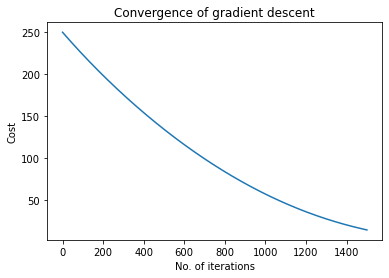

In [53]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

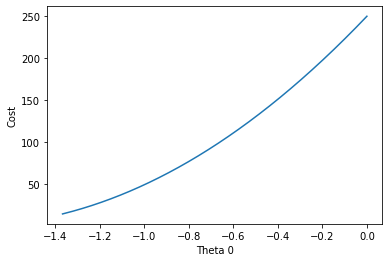

In [54]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

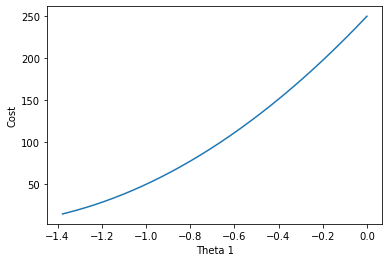

In [55]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

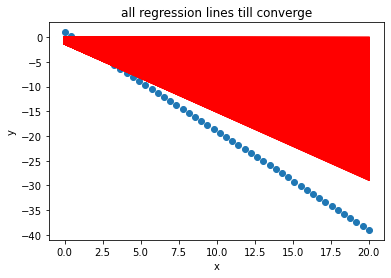

In [56]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

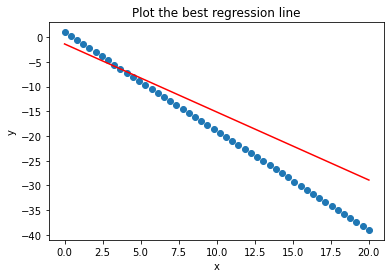

In [57]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Trial 1 (learning_rate =0.01 ,beta1 = 0.9,beta2 = 0.99, iterations=1000)


In [58]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.01
eps = 1e-8
beta1 = 0.9
beta2 = 0.99
iterations = 1000

In [59]:
theta_output, cost_output, predictions_output = Adam_training(X, y, theta, learning_rate, iterations,beta1,beta2)

iter=0, theta=[[0.]
 [0.]],  cost= 247.11166224509677
iter=1, theta=[[-0.01]
 [-0.01]],  cost= 244.35151708745383
iter=2, theta=[[-0.01999858]
 [-0.01999863]],  cost= 241.60756584253585
iter=3, theta=[[-0.02999477]
 [-0.02999497]],  cost= 238.88004959907778
iter=4, theta=[[-0.03998762]
 [-0.03998809]],  cost= 236.16920370385114
iter=5, theta=[[-0.04997618]
 [-0.04997708]],  cost= 233.4752571730913
iter=6, theta=[[-0.05995947]
 [-0.05996101]],  cost= 230.79843213690194
iter=7, theta=[[-0.06993655]
 [-0.06993897]],  cost= 228.13894332048287
iter=8, theta=[[-0.07990648]
 [-0.07991004]],  cost= 225.4969975655463
iter=9, theta=[[-0.0898683 ]
 [-0.08987333]],  cost= 222.87279339476638
iter=10, theta=[[-0.09982109]
 [-0.09982794]],  cost= 220.26652062156091
iter=11, theta=[[-0.10976394]
 [-0.109773  ]],  cost= 217.67836000693947
iter=12, theta=[[-0.11969595]
 [-0.11970764]],  cost= 215.10848296458306
iter=13, theta=[[-0.12961622]
 [-0.12963102]],  cost= 212.55705131476003
iter=14, theta=[[-0.

In [60]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.01      ]
 [-0.01408163]
 [-0.01816327]
 [-0.0222449 ]
 [-0.02632653]
 [-0.03040816]
 [-0.0344898 ]
 [-0.03857143]
 [-0.04265306]
 [-0.04673469]
 [-0.05081633]
 [-0.05489796]
 [-0.05897959]
 [-0.06306122]
 [-0.06714286]
 [-0.07122449]
 [-0.07530612]
 [-0.07938776]
 [-0.08346939]
 [-0.08755102]
 [-0.09163265]
 [-0.09571429]
 [-0.09979592]
 [-0.10387755]
 [-0.10795918]
 [-0.11204082]
 [-0.11612245]
 [-0.12020408]
 [-0.12428571]
 [-0.12836735]
 [-0.13244898]
 [-0.13653061]
 [-0.14061224]
 [-0.14469388]
 [-0.14877551]
 [-0.15285714]
 [-0.15693878]
 [-0.16102041]
 [-0.16510204]
 [-0.16918367]
 [-0.17326531]
 [-0.17734694]
 [-0.18142857]
 [-0.1855102 ]
 [-0.18959184]
 [-0.19367347]
 [-0.1977551 ]
 [-0.20183673]
 [-0.20591837]
 [-0.21      ]]
iter=1, hypothesis_output = [[-0.01999858]
 [-0.02816128]
 [-0.03632399]
 [-0.04448669]
 [-0.0526494 ]
 [-0.06081211]
 [-0.06897481]
 [-0.07713752]
 [-0.08530022]
 [-0.09346293]
 [-0.10162563]
 [-0.10978834]
 [-0.11795105

In [61]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.7220495224004855
optimum value of Theta_1:  -1.9790092406008948
Best regression line:  [[  0.72204952]
 [ -0.08570935]
 [ -0.89346823]
 [ -1.7012271 ]
 [ -2.50898597]
 [ -3.31674485]
 [ -4.12450372]
 [ -4.93226259]
 [ -5.74002147]
 [ -6.54778034]
 [ -7.35553921]
 [ -8.16329809]
 [ -8.97105696]
 [ -9.77881584]
 [-10.58657471]
 [-11.39433358]
 [-12.20209246]
 [-13.00985133]
 [-13.8176102 ]
 [-14.62536908]
 [-15.43312795]
 [-16.24088683]
 [-17.0486457 ]
 [-17.85640457]
 [-18.66416345]
 [-19.47192232]
 [-20.27968119]
 [-21.08744007]
 [-21.89519894]
 [-22.70295782]
 [-23.51071669]
 [-24.31847556]
 [-25.12623444]
 [-25.93399331]
 [-26.74175218]
 [-27.54951106]
 [-28.35726993]
 [-29.16502881]
 [-29.97278768]
 [-30.78054655]
 [-31.58830543]
 [-32.3960643 ]
 [-33.20382317]
 [-34.01158205]
 [-34.81934092]
 [-35.62709979]
 [-36.43485867]
 [-37.24261754]
 [-38.05037642]
 [-38.85813529]]


In [62]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9998564849657743


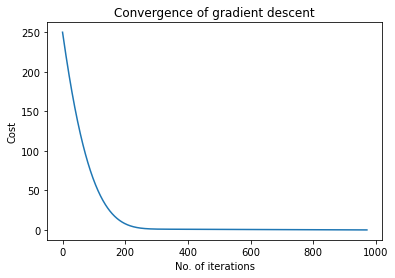

In [63]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

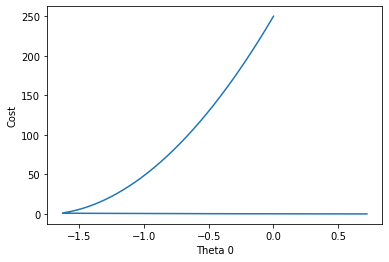

In [64]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

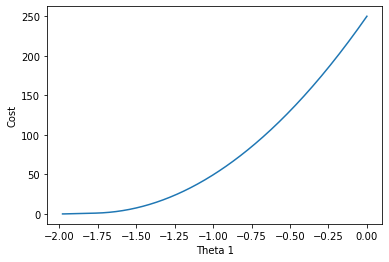

In [65]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

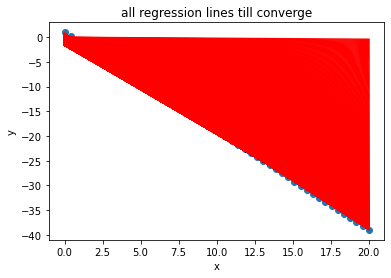

In [66]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

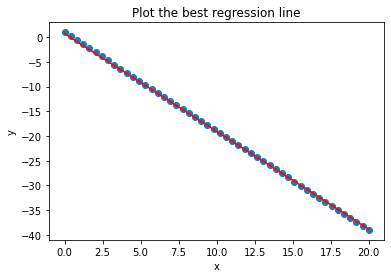

In [67]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Comparison

In [104]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.01
eps = 1e-8
beta1 = 0.9
beta2 = 0.99
iterations = 4000

In [105]:
AdaGrad_theta_output, AdaGrad_cost_output, AdaGrad_predictions_output = AdaGrad_training(X, y, theta, learning_rate, iterations)
RMSProp_theta_output, RMSProp_cost_output, RMSProp_predictions_output = RMSProp_training(X, y, theta, learning_rate, iterations,beta)
Adam_theta_output, Adam_cost_output, Adam_predictions_output = Adam_training(X, y, theta, learning_rate, iterations,beta1,beta2)

iter=0, theta=[[0.]
 [0.]],  cost= 247.11098958936313
iter=1, theta=[[-0.01000019]
 [-0.01000259]],  cost= 245.16220521748204
iter=2, theta=[[-0.01705088]
 [-0.01705643]],  cost= 243.57937808961393
iter=3, theta=[[-0.02279752]
 [-0.02280645]],  cost= 242.214476975172
iter=4, theta=[[-0.0277675 ]
 [-0.02777991]],  cost= 240.99820192082217
iter=5, theta=[[-0.03220775]
 [-0.0322237 ]],  cost= 239.89158999833282
iter=6, theta=[[-0.0362571 ]
 [-0.03627665]],  cost= 238.87018010053856
iter=7, theta=[[-0.04000274]
 [-0.0400259 ]],  cost= 237.91743156658072
iter=8, theta=[[-0.0435036 ]
 [-0.04353041]],  cost= 237.02154391352332
iter=9, theta=[[-0.04680174]
 [-0.04683221]],  cost= 236.1737499913571
iter=10, theta=[[-0.04992841]
 [-0.04996255]],  cost= 235.3673258569462
iter=11, theta=[[-0.05290757]
 [-0.05294539]],  cost= 234.59698083352822
iter=12, theta=[[-0.05575808]
 [-0.05579958]],  cost= 233.85846332250242
iter=13, theta=[[-0.05849509]
 [-0.05854029]],  cost= 233.14829587162149
iter=14, t

In [106]:
# for i in range(len(predictions_output)):
#     print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

# last_theta_0 = theta_output[-1][0]
# last_theta_1 = theta_output[-1][1]
# print('optimum value of Theta_0: ',last_theta_0)
# print('optimum value of Theta_1: ',last_theta_1)
AdaGrad_y_predicted = hypothesis(AdaGrad_theta_output[-1].reshape(2,1),X)
RMSProp_y_predicted = hypothesis(RMSProp_theta_output[-1].reshape(2,1),X)
Adam_y_predicted = hypothesis(Adam_theta_output[-1].reshape(2,1),X)
#print('Adam Best regression line: ',y_predicted)

In [107]:
from sklearn.metrics import r2_score 

AdaGrad_R_square = r2_score(y, AdaGrad_y_predicted) 
print('AdaGrad r2', AdaGrad_R_square)
RMSProp_R_square = r2_score(y, RMSProp_y_predicted) 
print('RMSProp r2 ', RMSProp_R_square)
Adam_R_square = r2_score(y, Adam_y_predicted) 
print('Adam r2    ', Adam_R_square)

AdaGrad r2 0.40467175140672607
RMSProp r2  0.9998558952964617
Adam r2     0.9998564849657743


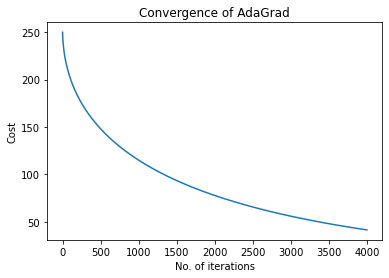

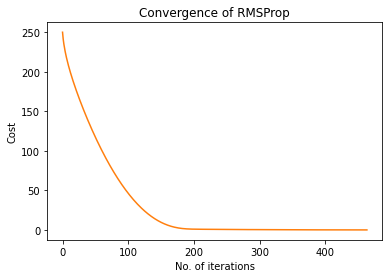

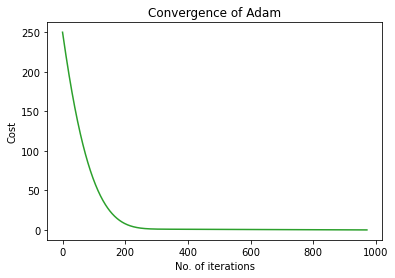

In [108]:
#Plot the cost function
plt.title('Convergence of AdaGrad')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(AdaGrad_cost_output)
plt.show()

plt.title('Convergence of RMSProp')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(RMSProp_cost_output, 'tab:orange')
plt.show()

plt.title('Convergence of Adam')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(Adam_cost_output, 'tab:green')

plt.show()

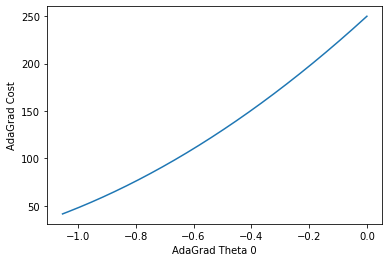

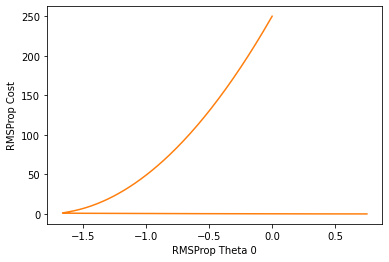

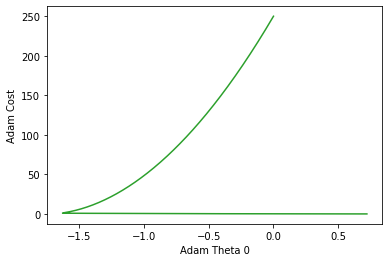

In [109]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('AdaGrad Theta 0')
plt.ylabel('AdaGrad Cost')
plt.plot(AdaGrad_theta_output[:,0],AdaGrad_cost_output)

plt.show()

plt.xlabel('RMSProp Theta 0')
plt.ylabel('RMSProp Cost')
plt.plot(RMSProp_theta_output[:,0],RMSProp_cost_output, 'tab:orange')

plt.show()

plt.xlabel('Adam Theta 0')
plt.ylabel('Adam Cost')
plt.plot(Adam_theta_output[:,0],Adam_cost_output, 'tab:green')

plt.show()

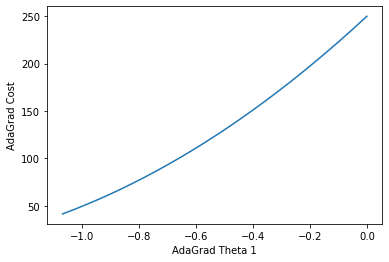

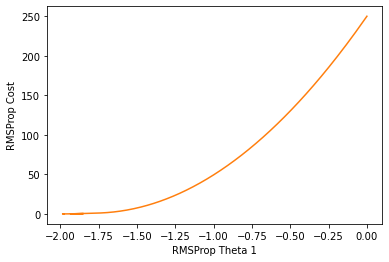

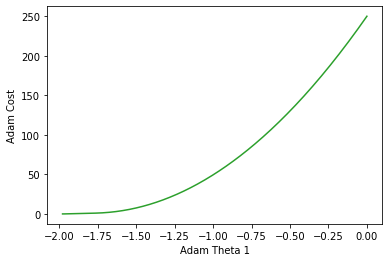

In [110]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('AdaGrad Theta 1')
plt.ylabel('AdaGrad Cost')
plt.plot(AdaGrad_theta_output[:,1],AdaGrad_cost_output)

plt.show()

plt.xlabel('RMSProp Theta 1')
plt.ylabel('RMSProp Cost')
plt.plot(RMSProp_theta_output[:,1],RMSProp_cost_output, 'tab:orange')

plt.show()

plt.xlabel('Adam Theta 1')
plt.ylabel('Adam Cost')
plt.plot(Adam_theta_output[:,1],Adam_cost_output, 'tab:green')

plt.show()

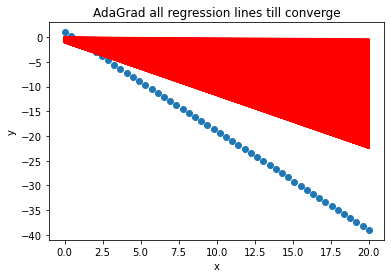

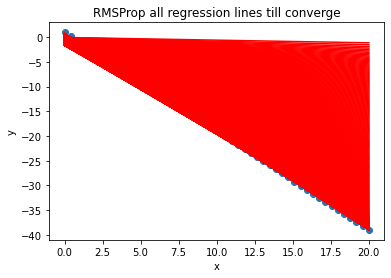

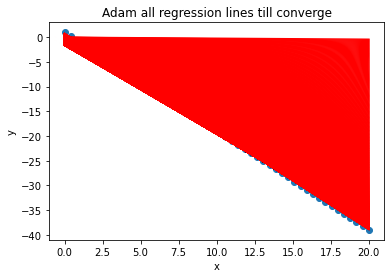

In [111]:
plt.scatter(X[:,1], y)
for i in range(1,len(AdaGrad_predictions_output)):
    plt.plot(X[:,1], AdaGrad_predictions_output[i], c='red')
plt.title('AdaGrad all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(X[:,1], y)
for i in range(1,len(RMSProp_predictions_output)):
    plt.plot(X[:,1], RMSProp_predictions_output[i], c='red')
plt.title('RMSProp all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(X[:,1], y)
for i in range(1,len(Adam_predictions_output)):
    plt.plot(X[:,1], Adam_predictions_output[i], c='red')
plt.title('Adam all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

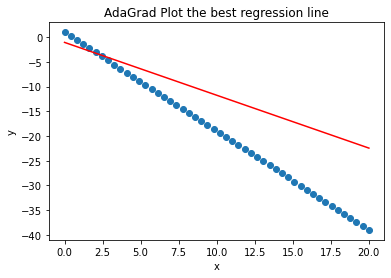

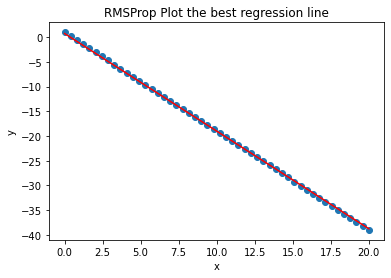

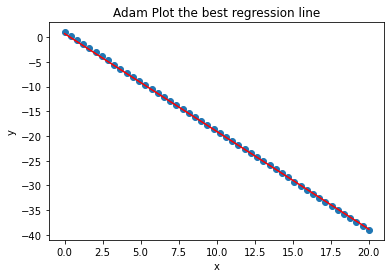

In [112]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], AdaGrad_y_predicted, c='red')
plt.title('AdaGrad Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(X[:,1], y)
plt.plot(X[:,1], RMSProp_y_predicted, c='red')
plt.title('RMSProp Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(X[:,1], y)
plt.plot(X[:,1], Adam_y_predicted, c='red')
plt.title('Adam Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Congratulations 
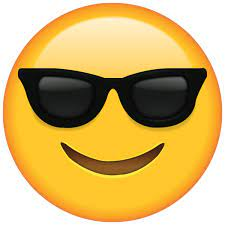